# DeepDriveMD with ADRP

## Configuration

- Node count: 10 nodes on Summit, 60 GPUs
- Iteration count: 10
- contact matrix size: [166,166,1] for adrp
- Simulation length: 5ns for the first and then 1ns
- Retraining interval: every 5th iteration i.e. iter1 and iter6 out of 10 iterations
- Walltime: 6+ hours


In [1]:
import pandas as pd

## Raw data (collected manually)

In [2]:
res={'md': [1913, 423, 427, 425, 427, 429, 424, 424, 420, 427],
     'hdf5': [15, 0, 0, 0, 0, 73, 0, 0, 0, 0], 
     'cvae': [1177, 0, 0, 0, 0, 2321, 0, 0, 0, 0], 
     'infer': [4693, 1274, 1153, 1344, 1423, 4623, 2003, 2328, 2345, 2258]}
res_infer_with_cpu_only = res
res = {'md': [2135, 447, 425, 475, 428, 423, 424, 427, 429, 466], 
       'hdf5': [14, 0, 0, 0, 0, 111, 0, 0, 0, 0], 
       'cvae': [1176, 0, 0, 0, 0, 2341, 0, 0, 0, 0],
       'infer': [2674, 803, 783, 711, 677, 2614, 771, 847, 883, 807]}

In [3]:
tot=0
util=0
for r in res:
    tot += sum(res[r])
    if r == "md":
        util += sum(res[r])
    if r == "hdf5":
        util += sum(res[r])*1/60
    if r == "cvae":
        util += sum(res[r])*6/60
    if r == "infer":
        util += sum(res[r])*1/60

print(util,tot, 100*util/tot)


6625.616666666666 21291 31.119330546553314


## Accumulated stage durations

Text(0.5, 0, 'ADRP/6hrs/60GPUs')

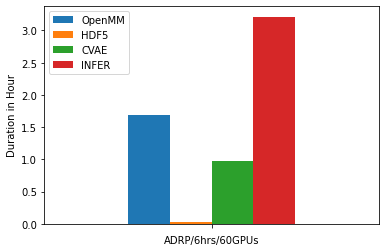

In [4]:
df = pd.DataFrame({"OpenMM": sum(res['md'])/3600,
                  "HDF5":sum(res['hdf5'])/3600,
                  "CVAE":sum(res['cvae'])/3600,
                  "INFER":sum(res['infer'])/3600},index=[''])
ax=df.plot.bar(rot=0)
ax.set_ylabel('Duration in Hour')
ax.set_xlabel('ADRP/6hrs/60GPUs')

## Stage duration on each iteration

In [5]:
index = [ "iter-%s" % x for x in range(1,11) ]

Text(0, 0.5, 'Duration in Minute')

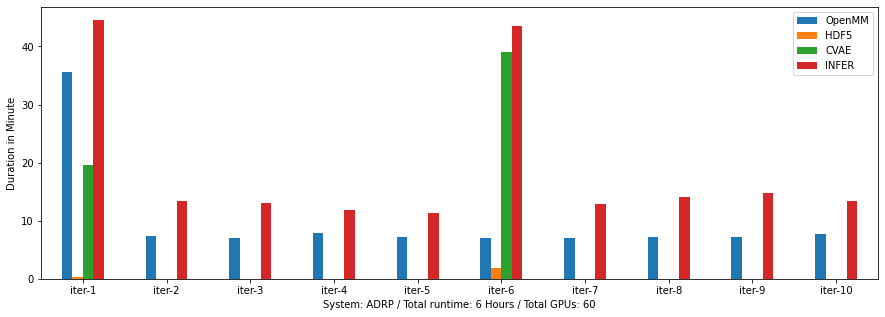

In [6]:
df = pd.DataFrame({"OpenMM": [ x / 60 for x in res['md']],
                  "HDF5":[ x / 60 for x in res['hdf5']],
                  "CVAE":[ x / 60 for x in res['cvae']],
                  "INFER":[ x / 60 for x in res['infer']]}, index=index)
ax=df.plot.bar(rot=0,figsize=(15,5))
ax.set_xlabel("System: ADRP / Total runtime: 6 Hours / Total GPUs: 60")
ax.set_ylabel('Duration in Minute')

## TTX in seconds

In [7]:
ttx=0
for x in res:
    ttx += sum(res[x])
ttx

21291

## GPU Utilization

In [8]:
tot=0
util=0
for r in res:
    tot += sum(res[r])
    if r == "md":
        util += sum(res[r])
    if r == "hdf5":
        util += sum(res[r])*1/60
    if r == "cvae":
        util += sum(res[r])*6/60
    if r == "infer":
        util += sum(res[r])*1/60

from pprint import pprint
pprint({"GPU (sec) fully utilized":util,
       "TTX (sec)": tot,
       "GPU Utilization (%)": 100*util/tot})

{'GPU (sec) fully utilized': 6625.616666666666,
 'GPU Utilization (%)': 31.119330546553314,
 'TTX (sec)': 21291}
